# Lending club case study
The aim of this case study is to identify the driving factors behind loan default. Identify the parameters which are strong indicators of loan default. For this we are going to use EDA Analysis. Following are the major steps used :-
1. Data Processing/Loading

2. Data Cleaning
 - Removing missing values column
 - Removing columns with single value data
 - Removing non-relevant columns


3. Data Analysis 
 - Converting the datatypes
 - Derived Columns
 - Univariate Analysis
 - Bivariate Analysis
4. Recommendation


## 1. Data Processing/Loading

In [1252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [1253]:
#reading the data
loan_data = pd.read_csv("loan.csv")
loan_data.shape

(39717, 111)

In [1254]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 2. Data Cleaning

### - Removing missing values column

In [1255]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<AxesSubplot:>

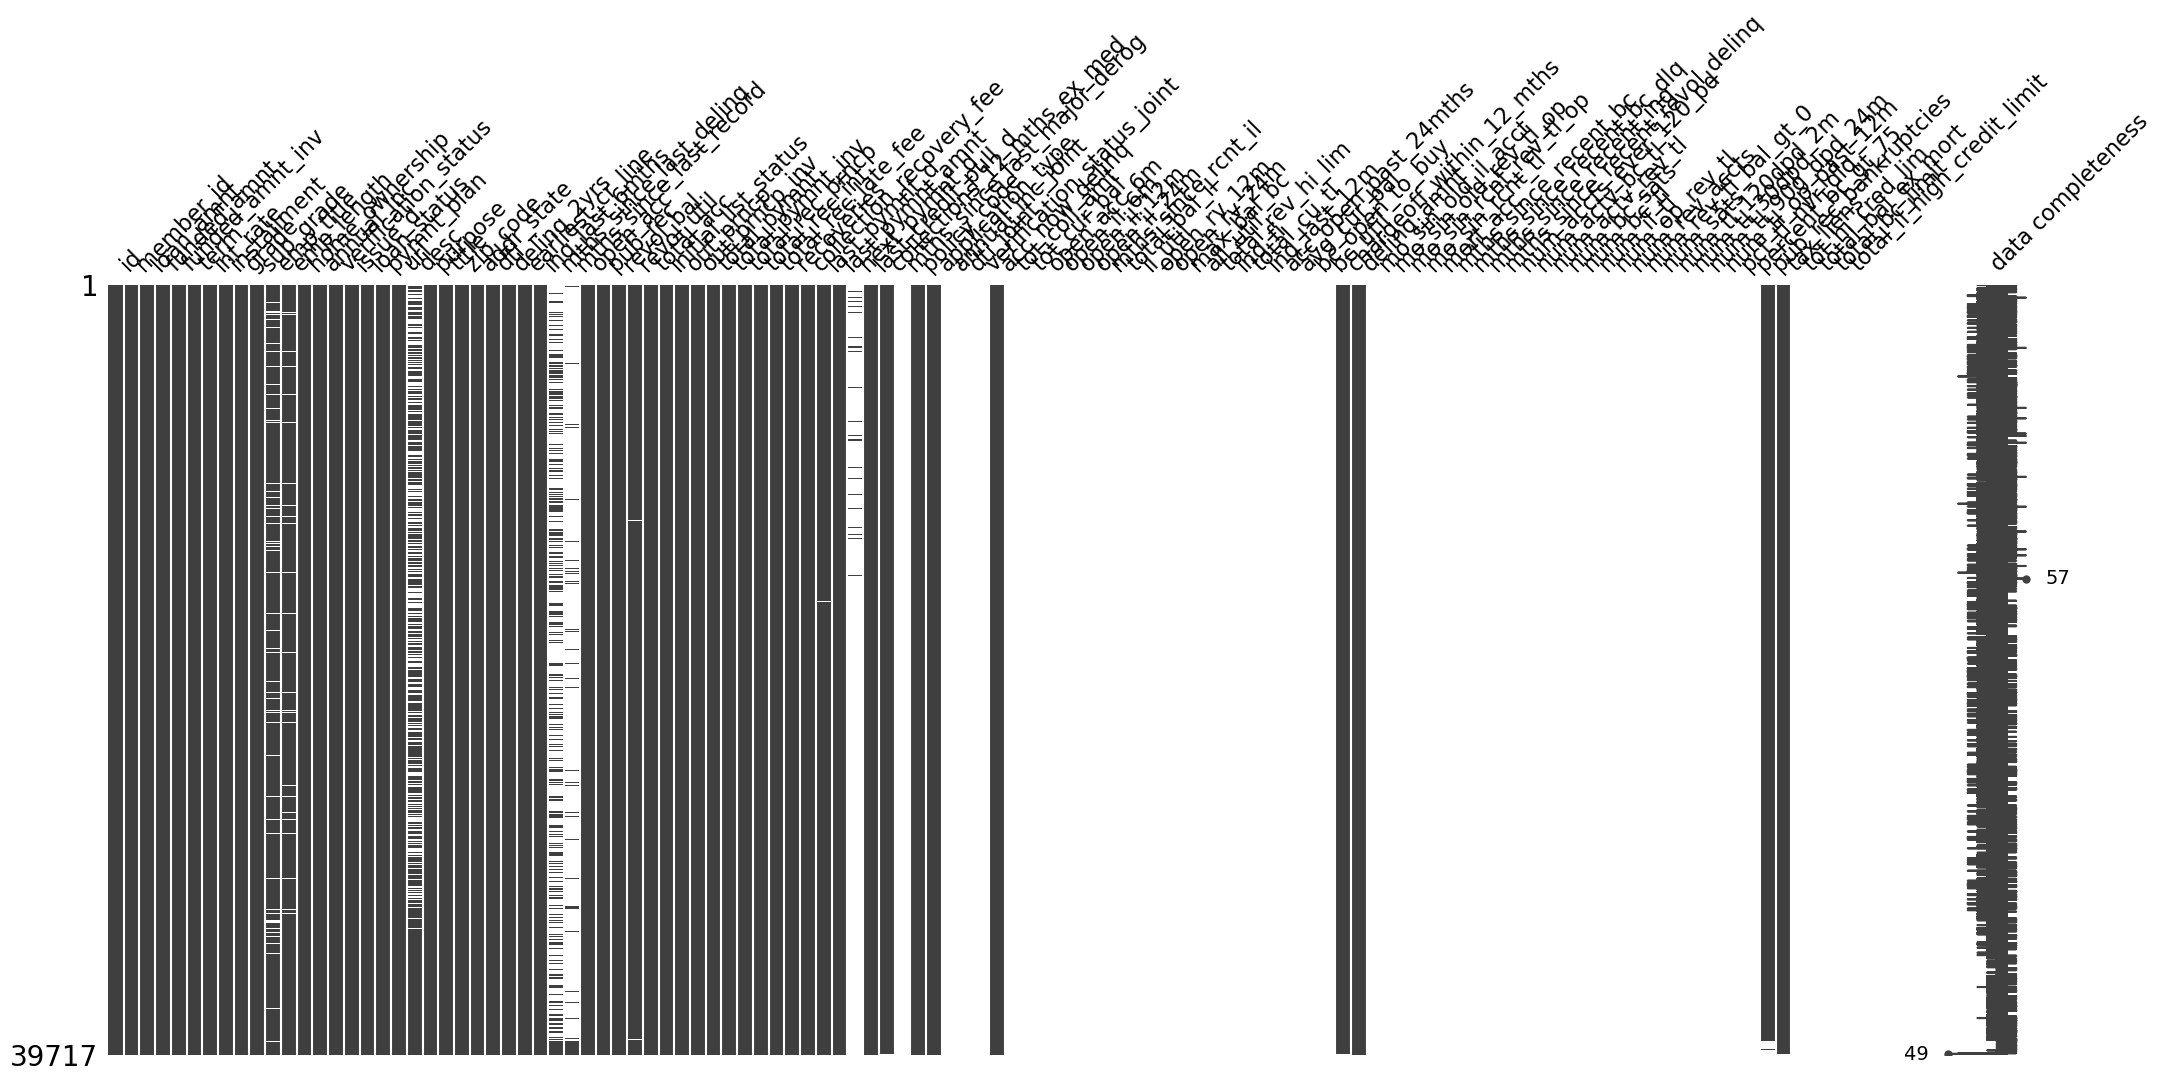

In [1256]:
msno.matrix(loan_data,labels=True)

**Droping all columns with missing values**

In [1257]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<AxesSubplot:>

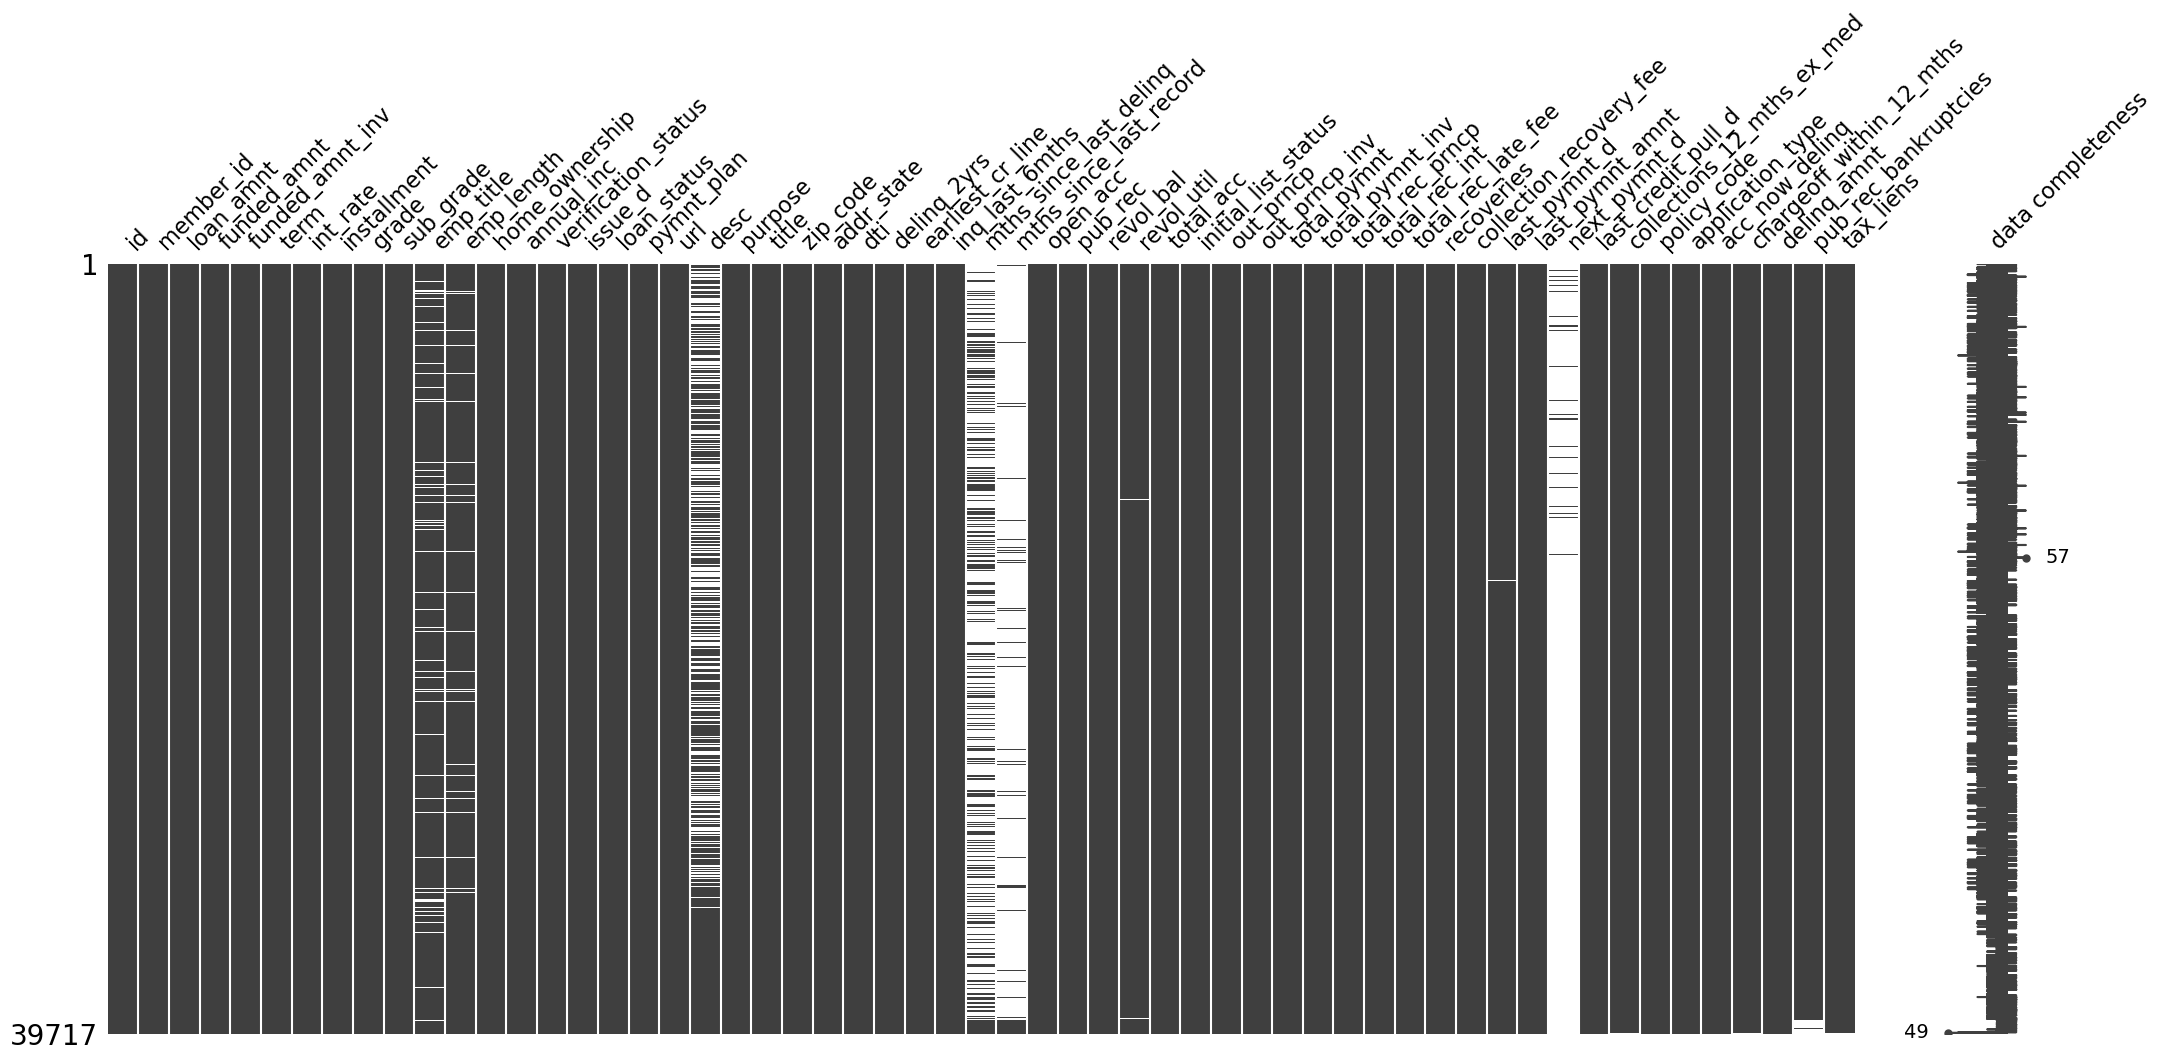

In [1258]:
msno.matrix(loan_data,labels=True)

### -Removing columns with single value data

In [1259]:
# Get the count of unique value in each column.
loan_data.nunique().sort_values(ascending=True).head(12)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
next_pymnt_d                  2
pub_rec_bankruptcies          3
dtype: int64

In [1260]:
# Removing the columns with only 1 unique value , since its not going to impact the decision of user loan default
loan_data.drop(["tax_liens","delinq_amnt","chargeoff_within_12_mths","acc_now_delinq","application_type","policy_code","collections_12_mths_ex_med","pymnt_plan","initial_list_status"], axis = 1, inplace = True)

In [1261]:
loan_data.shape

(39717, 48)

### - Removing non-relevant columns
There are many columns which are specific to customer behaviour , these are not available at the time loan application. So removing all these.

In [1262]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [1263]:
## Following are the such columns
# "Id","member_id","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","zip_code"

In [1264]:
loan_data.drop(["id","member_id","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","url","desc","zip_code"], axis = 1, inplace = True)

In [1265]:

loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0.0


### Removing Current loan status data as its not required.

In [1266]:
##  Since we only require to evaluate for Fully paid and Default, So removing Current loan status data.
loan_data = loan_data[loan_data.loan_status != "Current"]

In [1267]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [1268]:
## converting loan_status to 0 (Not Defaulting),1 (Defaulting) for better analysis
loan_data["loan_status"] = loan_data["loan_status"].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data["loan_status"] = loan_data["loan_status"].apply(lambda x: pd.to_numeric(x))

In [1269]:
loan_data["loan_status"].value_counts()


0    32950
1     5627
Name: loan_status, dtype: int64

In [1270]:
round(np.mean(loan_data["loan_status"]),2)*100

15.0

Almost 15% of loan data is of default status.

In [1271]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,Computer,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,real estate business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0


## 3. Data Analysis


### Converting the datatypes


In [1272]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  int64  
 15  purpose            

**Looking at the data types- int_rate, emp_length are object type. Lets convert them as below:-**
- int_rate to float
- emp_length to int
- issue_d to datetime

In [1273]:
#converting to float
loan_data["int_rate"] = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [1274]:

#converting emp_length to float
loan_data["emp_length"] = loan_data["emp_length"].str.rstrip("years")
loan_data["emp_length"] = loan_data["emp_length"].str.replace("[+]","",regex=True)
loan_data["emp_length"] = loan_data["emp_length"].str.replace("< 1","0.5",regex=True)
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))



In [1275]:
#convertint issue_d to datetime
loan_data["issue_d"] = loan_data["issue_d"].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [1276]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            37544 non-null  float64       
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

In [1277]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,1,car,bike,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,0,other,personel,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0


Data type and data looks ok now.

### Univariate Analysis of each column


**Checking distibution of all 3 loan amount fields - loan_amnt,funded_amnt,funded_amnt_inv**

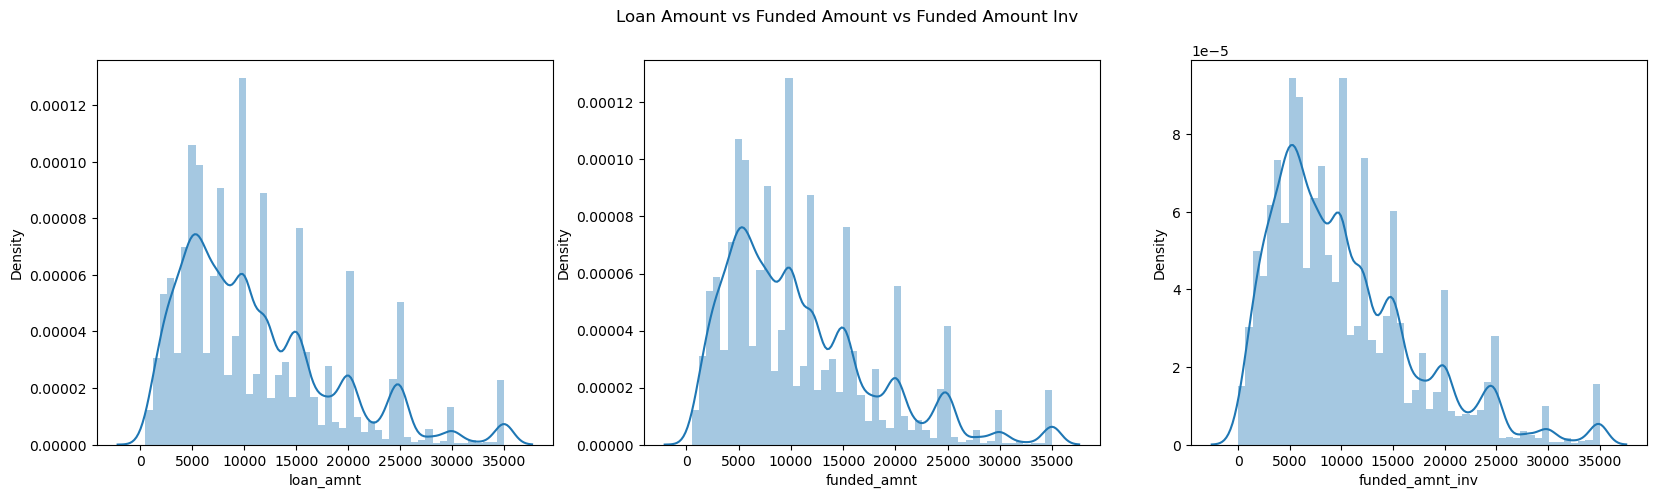

In [1278]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(loan_data.loan_amnt)


plt.subplot(1,3,2)
sns.distplot(loan_data.funded_amnt)

plt.subplot(1,3,3)
sns.distplot(loan_data.funded_amnt_inv)

plt.suptitle('Loan Amount vs Funded Amount vs Funded Amount Inv')
plt.show()

In [1279]:
# lets further group the loan amount in smaller groups for better understanding
def loan_amnt_group(amnt):
    if amnt < 5000:
        return '0-5K'
    elif amnt >=5000 and amnt < 10000:
        return '5K-10K'
    elif amnt  >= 10000 and amnt < 15000:
        return '10K-15K'
    elif amnt  >= 15000 and amnt < 20000:
        return '15K-20K'
    elif amnt  >= 20000 and amnt < 25000:
        return '20K-25K'
    else:
        return '25K+'
        
loan_data['loan_amnt_g'] = loan_data['loan_amnt'].apply(lambda x: loan_amnt_group(x))

<AxesSubplot:xlabel='loan_amnt_g', ylabel='count'>

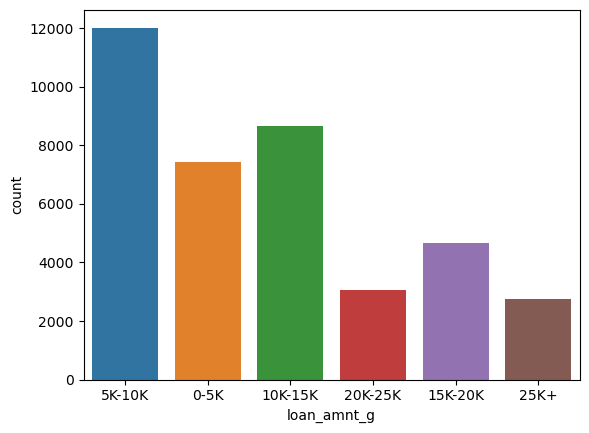

In [1280]:
sns.countplot(loan_data.loan_amnt_g)

**Observations:-**
- We find distribution of data for both loan_amnt and funded_amnt seems similar. 
- Majority of the loans are between loan amount of 5k to 15K.

<AxesSubplot:>

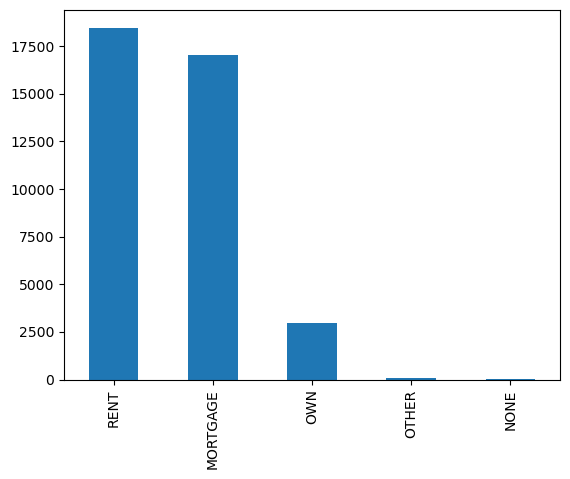

In [1281]:
loan_data.home_ownership.value_counts().plot.bar()

**Observation**
- People living in Rent and Mortgage have higher percentage of taking loans.

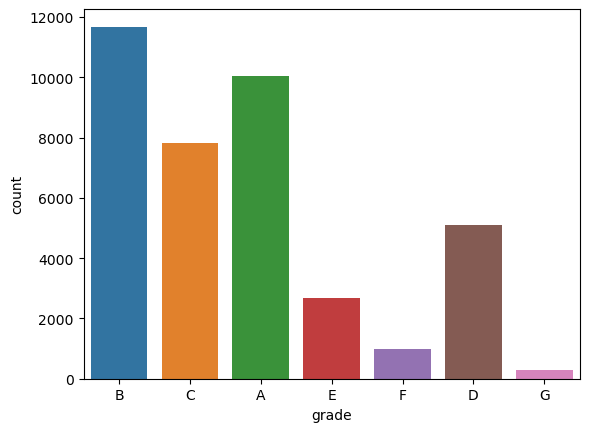

In [1282]:
#loan_data.grade.value_counts().plot.bar()
sns.countplot(x='grade',data=loan_data)
plt.show()

**Observations:-**
- Most of the loans are from Grade A and B.

<AxesSubplot:>

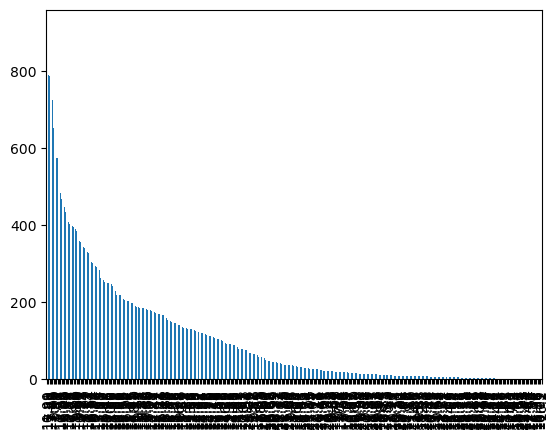

In [1283]:

#Analysis int_rate column
loan_data.int_rate.value_counts().plot.bar()

In [1284]:
# As we see data is not very readable so we will try to group the data into small groups so that its easy to understand.
loan_data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [1285]:
# Create new group column
def int_rate_group(x):
    if x<=5:
        return '0-5%'
    elif x >5 and x<=10:
        return '6%-10%'
    elif x > 10 and x<=15:
        return '11%-15%'
    elif x>15 and x<=20:
        return '16%-20%'
    else:
        return '20%+'
loan_data["int_rate_g"] = loan_data.apply(lambda x : int_rate_group(x['int_rate']), axis=1)

In [1286]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,loan_amnt_g,int_rate_g
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,...,Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,0.0,5K-10K,11%-15%
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,...,Source Verified,2011-12-01,1,car,bike,GA,1.00,0.0,0-5K,16%-20%
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,...,Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,0.0,0-5K,16%-20%
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,Source Verified,2011-12-01,0,other,personel,CA,20.00,0.0,10K-15K,11%-15%
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,5K-10K,6%-10%


<AxesSubplot:xlabel='int_rate_g', ylabel='count'>

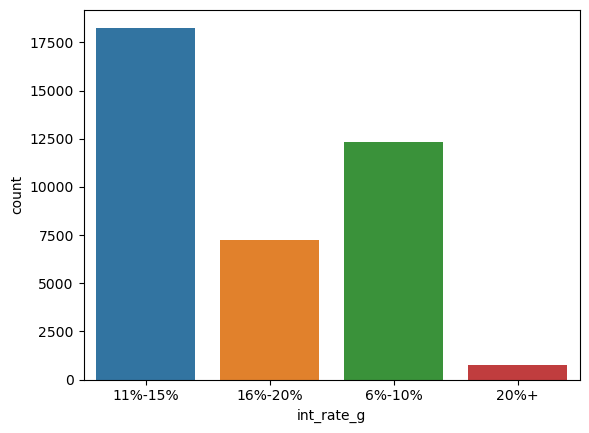

In [1287]:
sns.countplot(loan_data.int_rate_g)

**Observation:-**
- Majority of the loans are between interest rate of  11 -15%.

<AxesSubplot:xlabel='installment', ylabel='Density'>

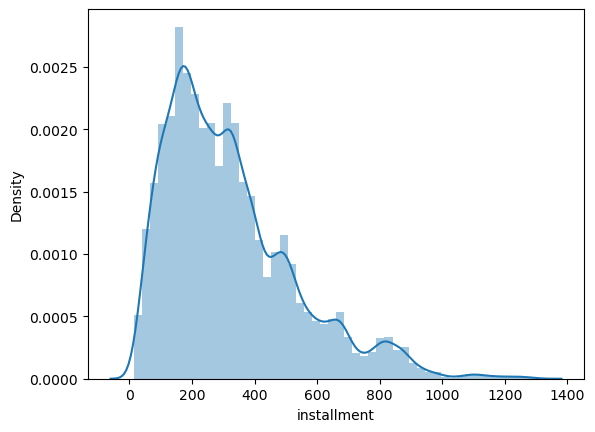

In [1288]:
sns.distplot(loan_data.installment)

In [1289]:
# we see the distribution of installment field. Lets group the data in smaller groups for better understanding
loan_data.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [1290]:
# Create new group column
def installment_group(x):
    if x<=300:
        return '0-300'
    elif x >300 and x<=600:
        return '300-600'
    elif x > 600 and x<=900:
        return '600-900'
    elif x > 900 and x<=1200:
        return '900-1200'
    else:
        return '1200+'
loan_data["installment_g"] = loan_data.apply(lambda x : installment_group(x['installment']), axis=1)

In [1291]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,loan_amnt_g,int_rate_g,installment_g
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,...,2011-12-01,0,credit_card,Computer,AZ,27.65,0.0,5K-10K,11%-15%,0-300
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,...,2011-12-01,1,car,bike,GA,1.00,0.0,0-5K,16%-20%,0-300
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,...,2011-12-01,0,small_business,real estate business,IL,8.72,0.0,0-5K,16%-20%,0-300
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,2011-12-01,0,other,personel,CA,20.00,0.0,10K-15K,11%-15%,300-600
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,5K-10K,6%-10%,0-300


<AxesSubplot:xlabel='installment_g', ylabel='count'>

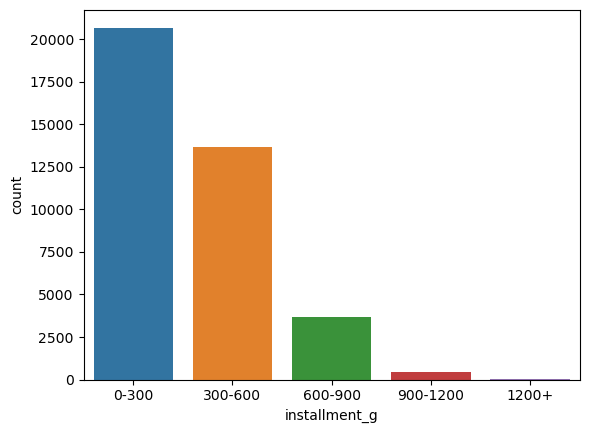

In [1292]:
sns.countplot(loan_data.installment_g)

**Observation:-**
- Majority of the loans are having installement amount less than 300.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

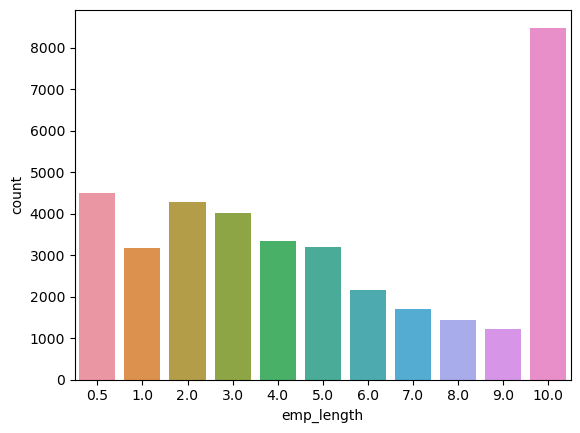

In [1152]:
sns.countplot(x='emp_length',data=loan_data)

**Observations:-**
- Majority of the people applying loan are having experience more than 10 years.

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

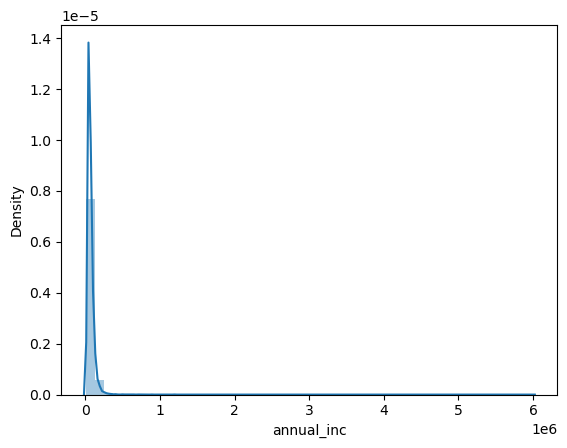

In [1153]:
sns.distplot(loan_data.annual_inc)

In [1154]:
# Since annual inc data is not very readable, we will try to fetch the data in order , so that we can further group it.
loan_data.annual_inc.head(200).sort_values(ascending=False)

170    225000.0
185    168000.0
74     150000.0
80     150000.0
193    140000.0
         ...   
30      17108.0
13      15000.0
9       15000.0
2       12252.0
168     12000.0
Name: annual_inc, Length: 200, dtype: float64

In [1155]:
def annual_income_group(n):
    if n <= 50000:
        return '0-50K'
    elif n > 50000 and n <=100000:
        return '50k-100k'
    elif n > 100000 and n <=150000:
        return '100k-150k'
    else:
        return '150k+'

loan_data['annual_inc_g'] = loan_data['annual_inc'].apply(lambda x: annual_income_group(x))

In [1157]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,int_rate_g,installment_g,annual_inc_g
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,...,2011-12-01,0,credit_card,Computer,AZ,27.65,0.0,11%-15%,0-300,0-50K
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,...,2011-12-01,1,car,bike,GA,1.00,0.0,16%-20%,0-300,0-50K
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,...,2011-12-01,0,small_business,real estate business,IL,8.72,0.0,16%-20%,0-300,0-50K
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,2011-12-01,0,other,personel,CA,20.00,0.0,11%-15%,300-600,0-50K
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,6%-10%,0-300,0-50K


<AxesSubplot:xlabel='annual_inc_g', ylabel='count'>

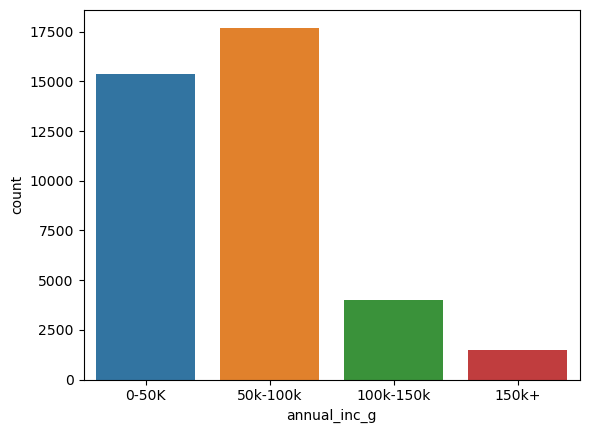

In [1158]:
sns.countplot(loan_data.annual_inc_g)

**Observation:-**
- Majority of loans fall between annual income of 50,000 to 1,00,000.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

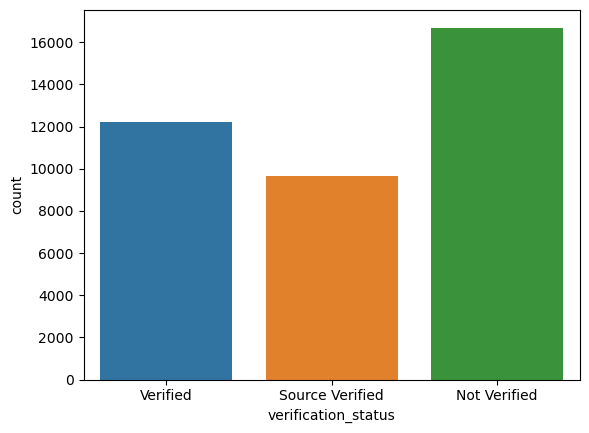

In [1159]:
sns.countplot(loan_data.verification_status)

**Observation:-**
- Not verified loans are higher as compared to others.

<AxesSubplot:xlabel='issue_d', ylabel='count'>

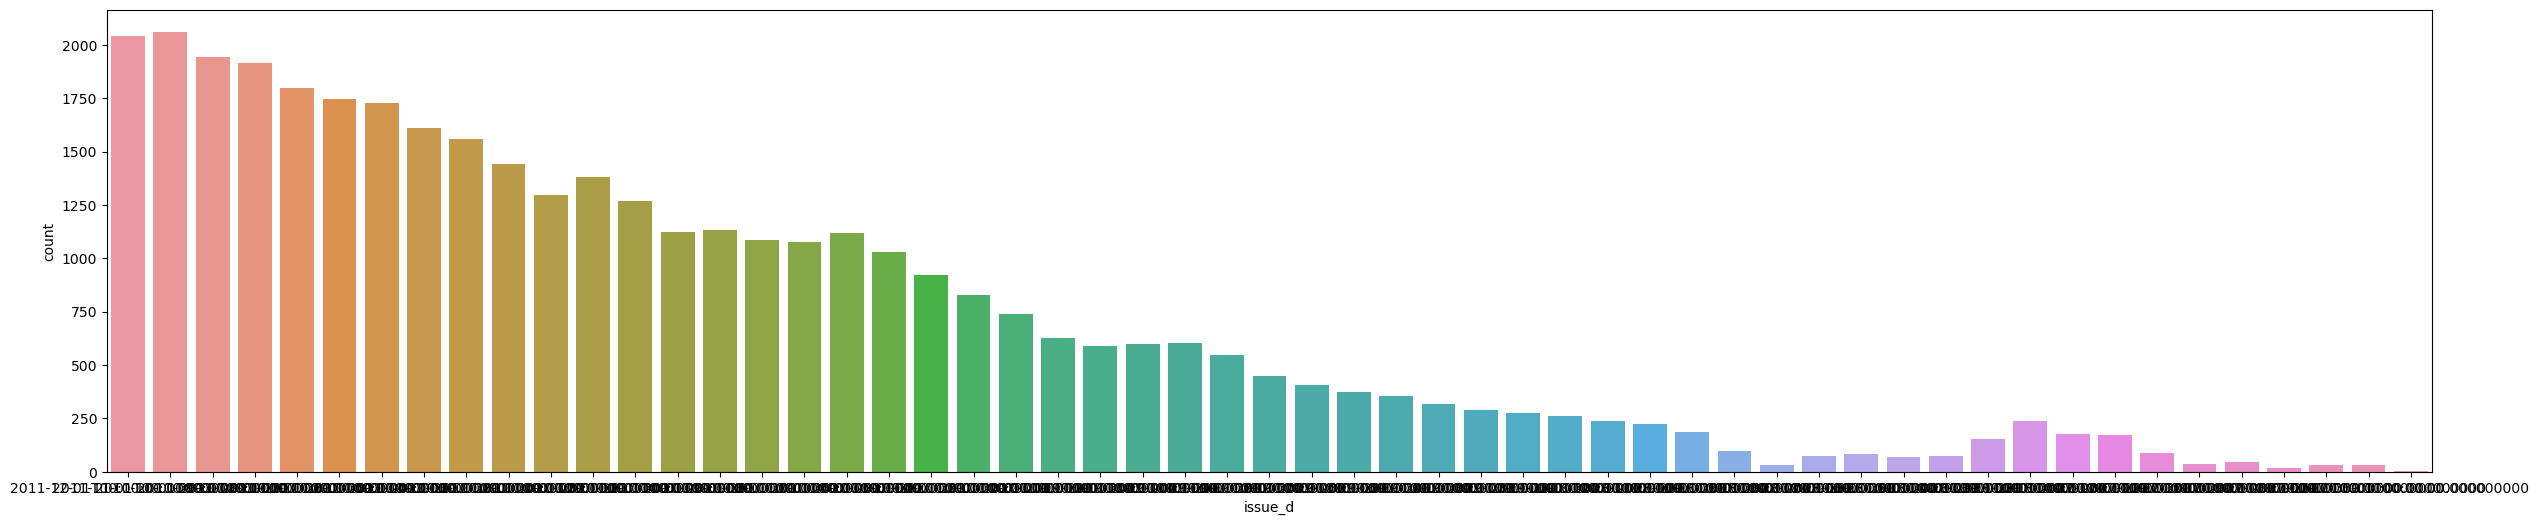

In [1293]:
plt.figure(figsize=(30,6))
sns.countplot(loan_data.issue_d)

In [1161]:
## Plotting by issue_d is not very readable, so we will try to create 2 new columns issue_year and issue_month

loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.strftime('%b')


In [1162]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,title,addr_state,dti,pub_rec_bankruptcies,int_rate_g,installment_g,annual_inc_g,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,...,credit_card,Computer,AZ,27.65,0.0,11%-15%,0-300,0-50K,2011,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,...,car,bike,GA,1.00,0.0,16%-20%,0-300,0-50K,2011,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,...,small_business,real estate business,IL,8.72,0.0,16%-20%,0-300,0-50K,2011,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,other,personel,CA,20.00,0.0,11%-15%,300-600,0-50K,2011,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,6%-10%,0-300,0-50K,2011,Dec


<AxesSubplot:xlabel='issue_year', ylabel='count'>

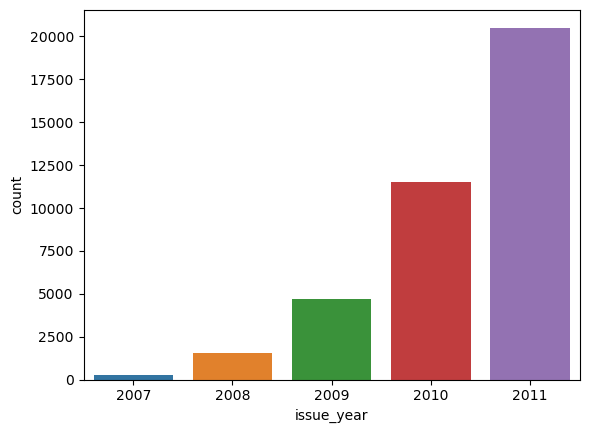

In [1163]:
sns.countplot(loan_data.issue_year)

<AxesSubplot:xlabel='issue_month', ylabel='count'>

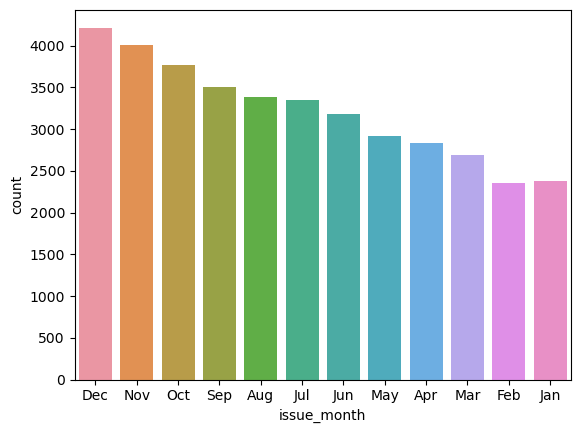

In [1164]:
sns.countplot(loan_data.issue_month)

**Observation:-**
- Number of loans are increasing year over over.
- Number of loans applications per month are increasing as it approaches year end.

<AxesSubplot:xlabel='purpose', ylabel='count'>

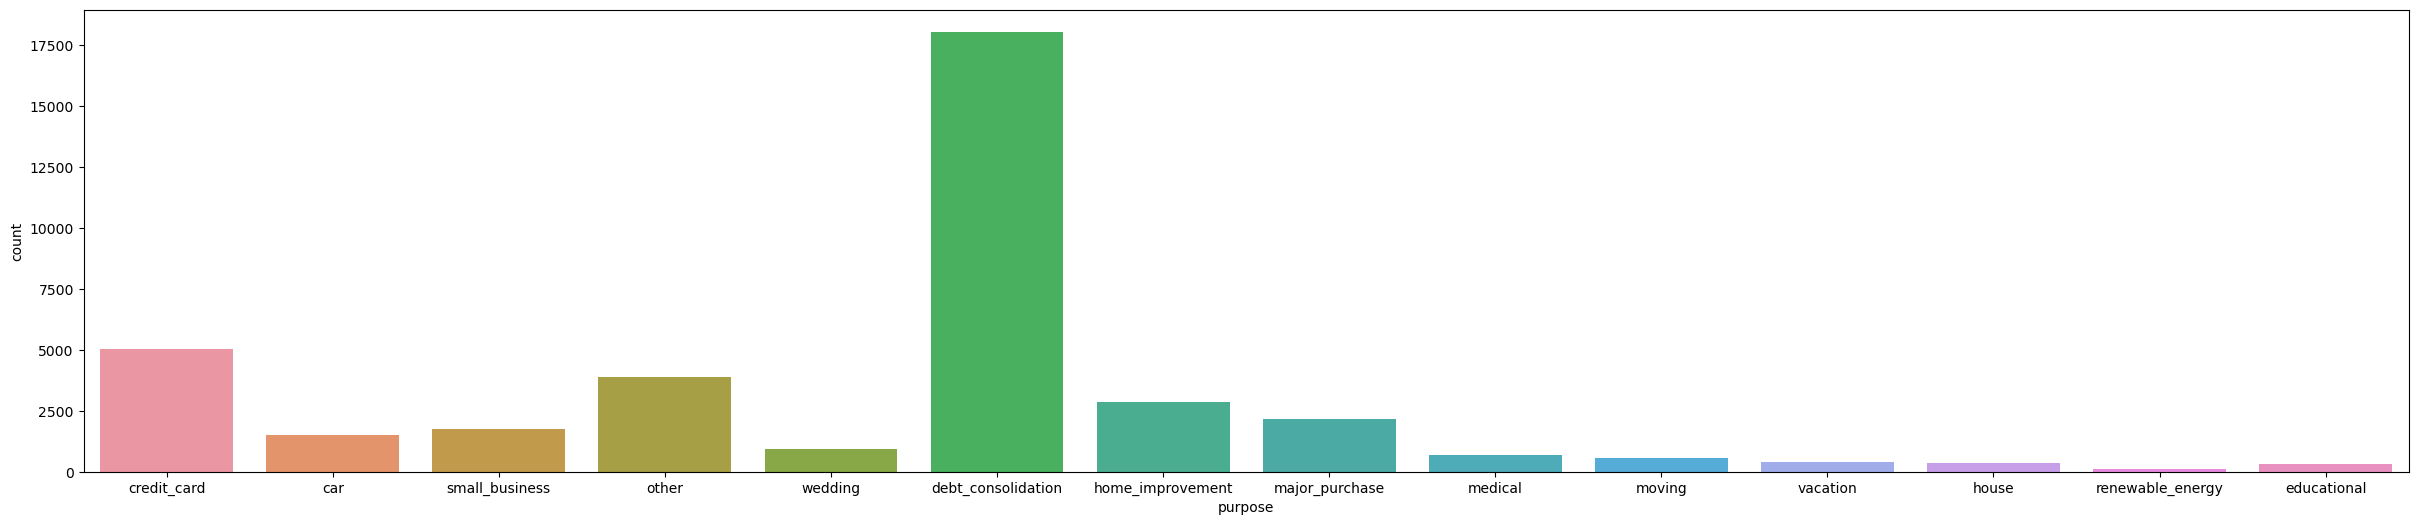

In [1295]:
plt.figure(figsize=(30,6))
sns.countplot(loan_data.purpose)

**Observation:-**
- More people has taken loan for debit consolidation purpose.

<AxesSubplot:xlabel='dti', ylabel='Density'>

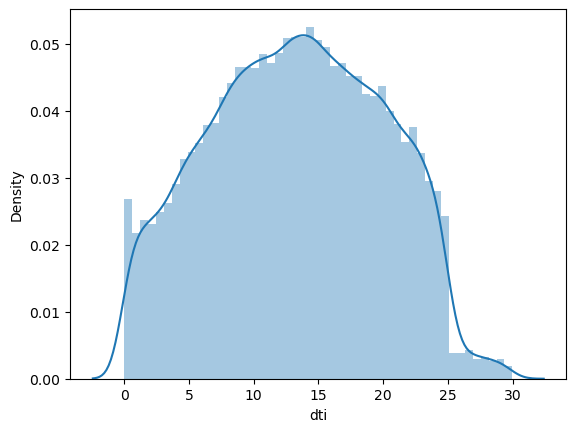

In [1170]:
sns.distplot(loan_data.dti)

In [1172]:
# lets try to further group dti into small groups for better understanding.
def dti_group(x):
    if x <= 5:
        return '0-5'
    elif x > 5 and x <=10:
        return '5-10'
    elif x > 10 and x <=15:
        return '10-15'
    elif x > 15 and x <=20:
        return '15-20'
    elif x > 20 and x <=25:
        return '20-25'
    else:
        return '25+'

loan_data['dti_g'] = loan_data['dti'].apply(lambda x: dti_group(x))

In [1173]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,title,addr_state,dti,pub_rec_bankruptcies,int_rate_g,installment_g,annual_inc_g,issue_year,issue_month,dti_g
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,...,Computer,AZ,27.65,0.0,11%-15%,0-300,0-50K,2011,Dec,25+
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0.5,...,bike,GA,1.00,0.0,16%-20%,0-300,0-50K,2011,Dec,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,...,real estate business,IL,8.72,0.0,16%-20%,0-300,0-50K,2011,Dec,5-10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,personel,CA,20.00,0.0,11%-15%,300-600,0-50K,2011,Dec,15-20
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,My wedding loan I promise to pay back,AZ,11.20,0.0,6%-10%,0-300,0-50K,2011,Dec,10-15


<AxesSubplot:xlabel='dti_g', ylabel='count'>

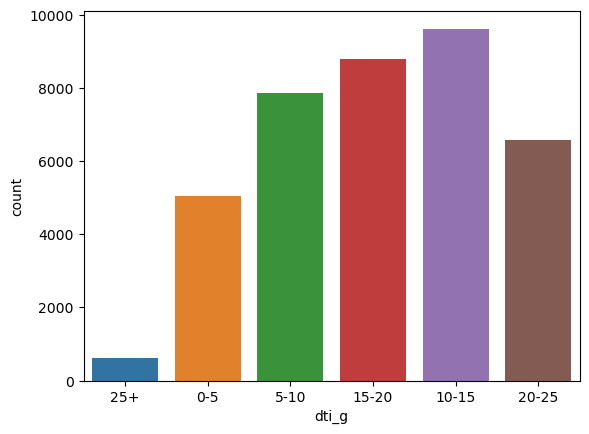

In [1174]:
sns.countplot(loan_data.dti_g)

**Observation:-**
- Higher amount of data is between 5-20 dti range.

So we are done with univariate analysis , now we will do bivarate analysis.

### Bivariate Analysis

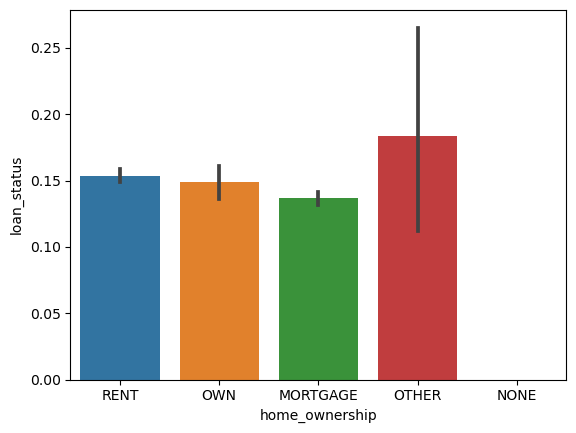

In [1176]:
# loan_status and home ownership
sns.barplot(x='home_ownership',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Chances of defaulting loan is less in Mortage. 

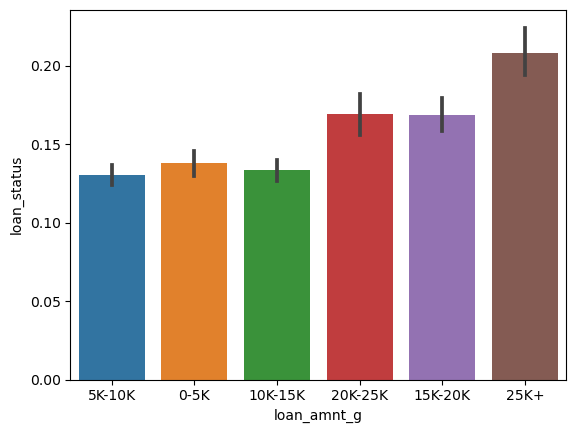

In [1182]:
# Comparing loan amount vs loan status
sns.barplot(x='loan_amnt_g',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- As the loan amount increase, chances of defaulting loan increases.

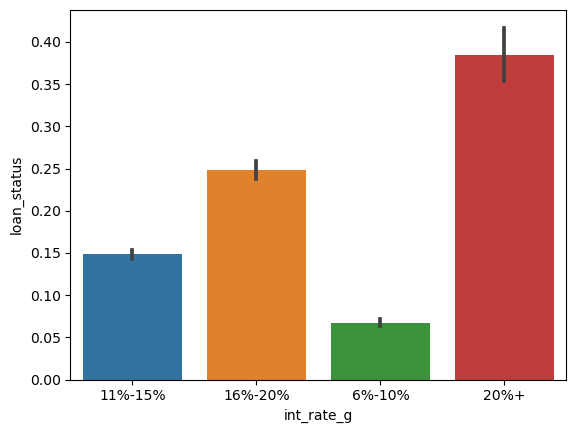

In [1183]:
# Comparing interest rate vs loan status
sns.barplot(x='int_rate_g',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Chances of defaulting loan is higher in case of higher interest rates especically when interest rate is more than 20%.
- Chances of defaulting is less when interest rate is less than 10%.

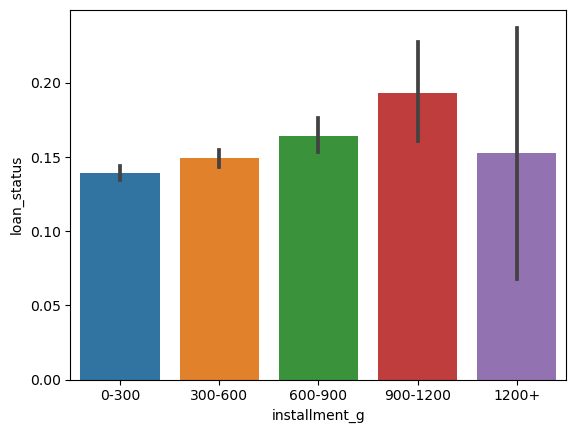

In [1184]:
# Comparing installement vs loan status
sns.barplot(x='installment_g',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Higher the installment , chances of defaulting loan are high, particularly when installment amount is between 900 and 1200.

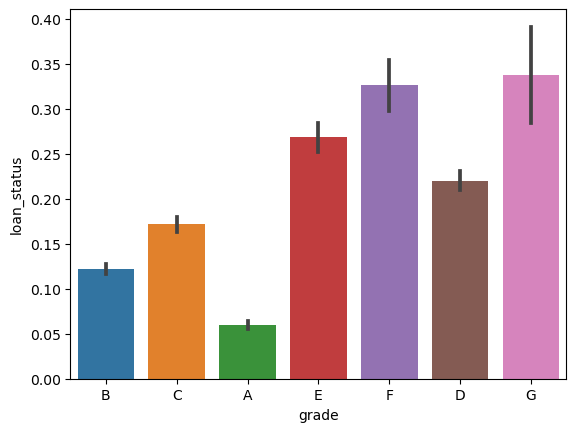

In [1185]:
# Comparing grade vs loan status
sns.barplot(x='grade',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- As Grade increase, chances of defaulting loan also increases.

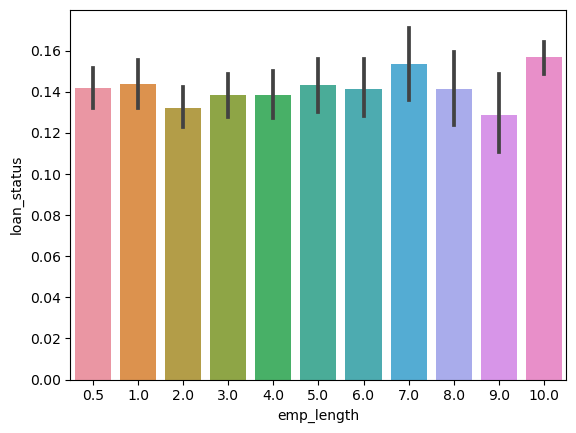

In [1187]:
# Comparing emp lenght vs loan status
sns.barplot(x='emp_length',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- This comparison is not giving much insight.
- Difficult to conclude anything based on this, so leaving this for now.

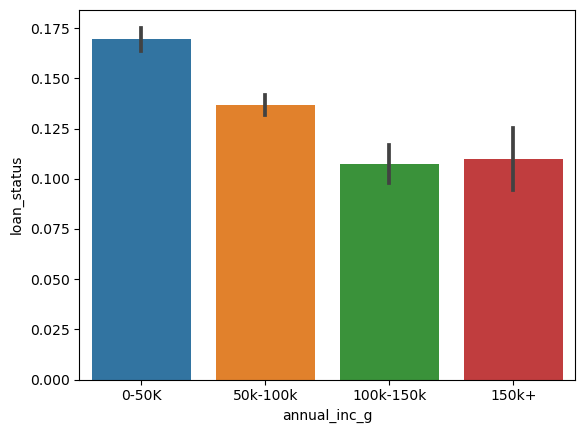

In [1188]:
# Comparing annual income vs loan status
sns.barplot(x='annual_inc_g',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Chances of defaulting loan is high with person having low income.
- Higher the income, more the chances of paying the loan.

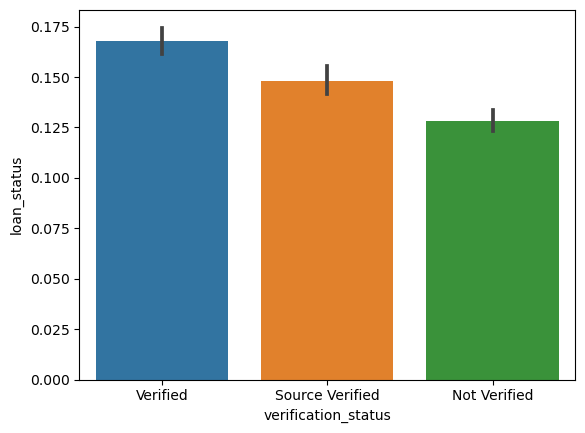

In [1189]:
# Comparing verification status vs loan status
sns.barplot(x='verification_status',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Chances of defaulting loan is higher in case of Verified loan.

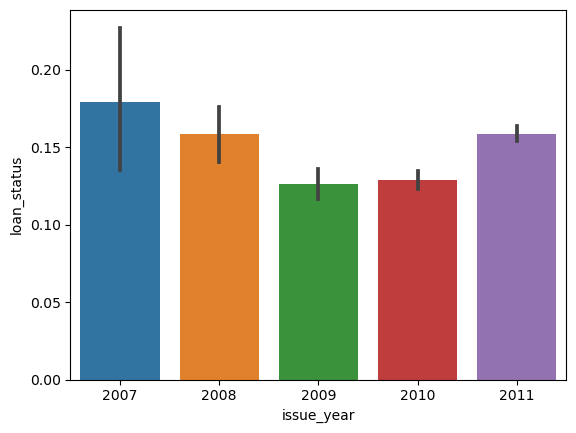

In [1190]:
# Comparing issue year vs loan status
sns.barplot(x='issue_year',y='loan_status',data=loan_data)
plt.show()

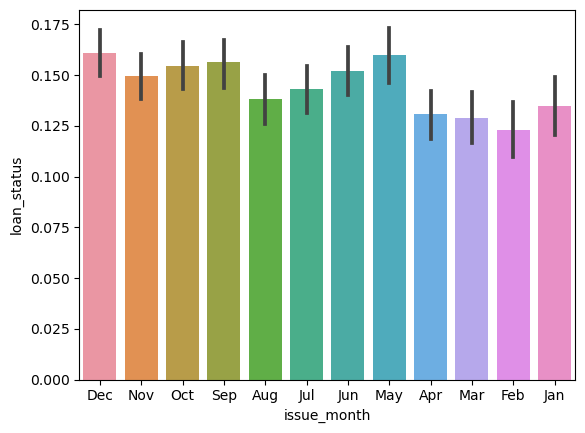

In [1191]:
# Comparing issue month vs loan status
sns.barplot(x='issue_month',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- In year 2007, we have high rate of loan defaults, That could be because of recession
- Chances of defaulting loan is less in initial month of years. 

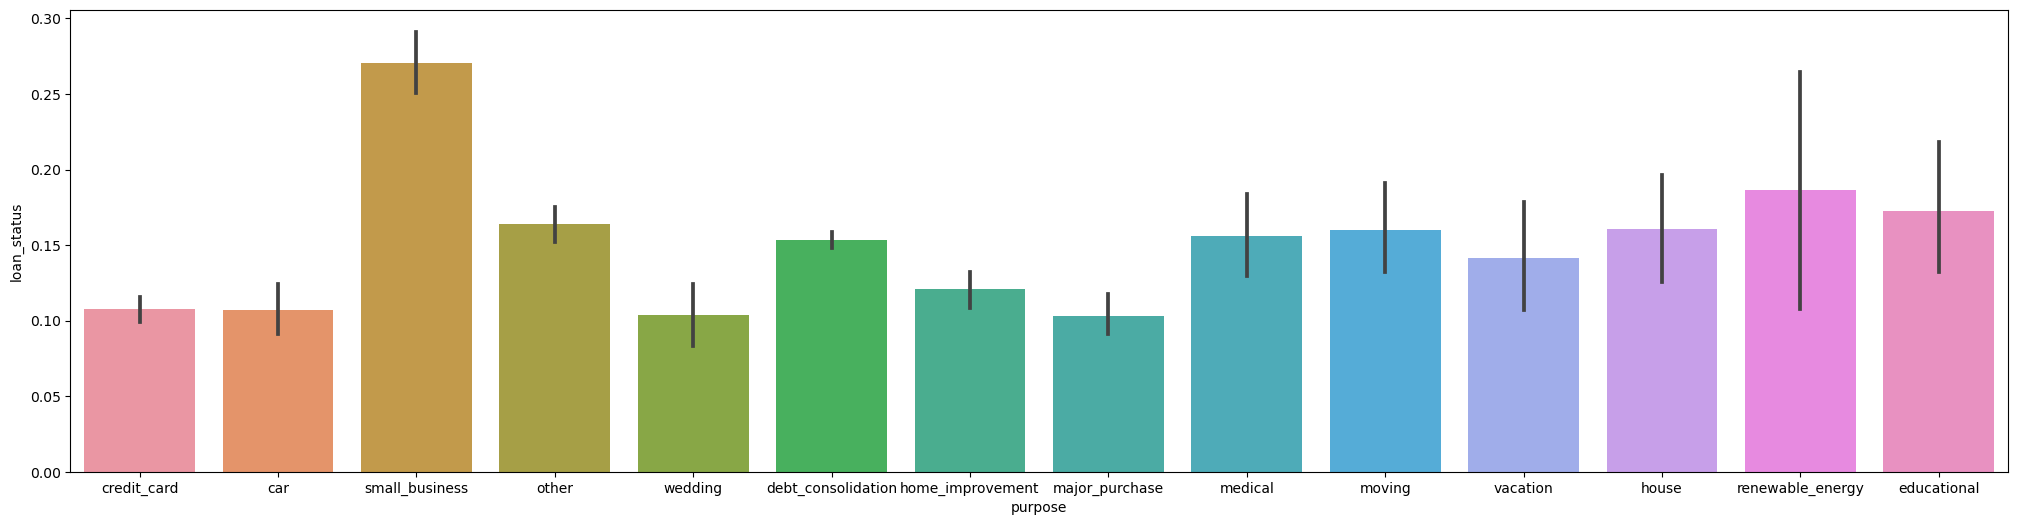

In [1194]:
# Comparing purpose vs loan status
plt.figure(figsize=(25,6))
sns.barplot(x='purpose',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Default rates are higher in case of small business.

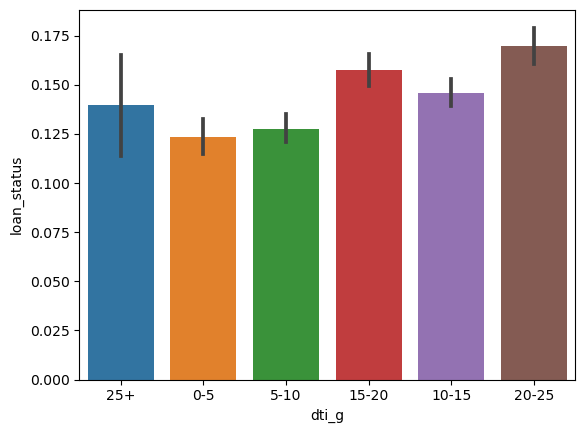

In [1195]:
# Comparing dti vs loan status
sns.barplot(x='dti_g',y='loan_status',data=loan_data)
plt.show()

**Observation:-**
- Higher the dti, higher the chances of defaulting loan.


## 4. Recommendation
- Lending club should approve loans with loan amount more than 20k after having more verification checks.
- Lending club should try to reduce the interest rate and bring it less than 15%
- Lending club should avoid approving loans with high grade.
- People having less annual income has more chances of defaulting loan, So lending club should be careful while giving loan in such scenario.
- Less DTI values have less chances of defaulting. So lending club should be careful while approving loans with higher DTI.
- Lending club should be careful while giving loan for small business.